In [14]:
%load_ext autoreload
%autoreload 2

from msr.signals.ppg import PPGSignal
from msr.signals.ecg import ECGSignal
from msr.data.raw.mimic import load_mimic_raw_data, FS
from msr.data.measurements.mimic import MimicMeasurement
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **Loading data and creating Signals objects**

In [15]:
data = load_mimic_raw_data("val").numpy()
print(data.shape)

idx=10
multi_sig_data = data[idx]
ppg, ecg = multi_sig_data.T

ppg_sig = PPGSignal("ppg", ppg, fs=FS)
ecg_sig = ECGSignal("ecg", ecg, fs=FS)
mimic_measurement = MimicMeasurement(ppg, ecg, fs=FS)

ppg_sig.set_beats()
ppg_sig.set_agg_beat()

ecg_sig.set_beats()
ecg_sig.set_agg_beat()

mimic_measurement.set_beats()
mimic_measurement.set_agg_beat()

(3832, 30000, 2)


/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/neurokit2/epochs/epochs_create.py:205: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colname, column in epochs[i].select_dtypes(include=["object"]).iteritems():
/home/shate/.cache/pypoetry/virtualenvs/msr-xbuxOujG-py3.8/lib/python3.8/site-packages/neurokit2/epochs/epochs_create.py:205: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colname, column in epochs[i].select_dtypes(include=["object"]).iteritems():


# **PPGSignal feature extraction**

{'ppg_basic_features__mean': 1.7572991528185078,
 'ppg_basic_features__std': 0.614549224655932,
 'ppg_basic_features__median': 1.5219941348973607,
 'ppg_basic_features__skewness': 0.5450757476677839,
 'ppg_basic_features__kurtosis': -0.469463676292611,
 'ppg_agg_beat_features__ppg_agg_beat_basic_features__mean': 1.7387228316137242,
 'ppg_agg_beat_features__ppg_agg_beat_basic_features__std': 0.5506369005686599,
 'ppg_agg_beat_features__ppg_agg_beat_basic_features__median': 1.4074444198539793,
 'ppg_agg_beat_features__ppg_agg_beat_basic_features__skewness': 0.8394115257689361,
 'ppg_agg_beat_features__ppg_agg_beat_basic_features__kurtosis': -0.8776172411687804,
 'ppg_agg_beat_features__ppg_agg_beat_crit_points__systolic_peak_loc': 21,
 'ppg_agg_beat_features__ppg_agg_beat_crit_points__systolic_peak_time': 0.12496062857142848,
 'ppg_agg_beat_features__ppg_agg_beat_crit_points__systolic_peak_val': 2.823523591207709,
 'ppg_agg_beat_features__ppg_agg_beat_sppg_features__duration': 0.59505061

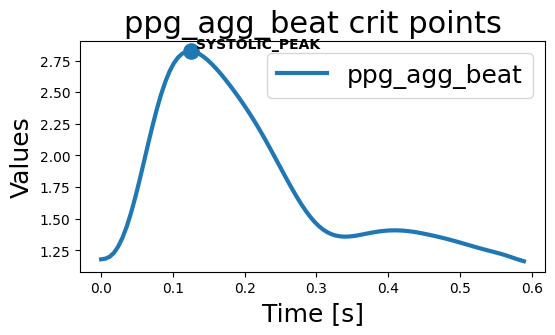

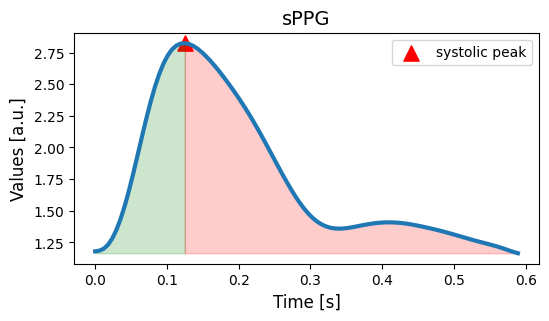

In [17]:
ppg_feats = dict(ppg_sig.extract_features(return_arr=False, plot=True))
ppg_feats

# **ECGSignal feature extraction**

{'ecg_basic_features__mean': 0.29260257412838053,
 'ecg_basic_features__std': 0.1868265411412319,
 'ecg_basic_features__median': 0.2649071358748778,
 'ecg_basic_features__skewness': 1.750498185849927,
 'ecg_basic_features__kurtosis': 4.877156512945016,
 'ecg_agg_beat_features__ecg_agg_beat_basic_features__mean': 0.0009344546904413642,
 'ecg_agg_beat_features__ecg_agg_beat_basic_features__std': 0.1328684167780084,
 'ecg_agg_beat_features__ecg_agg_beat_basic_features__median': -0.004630033619342042,
 'ecg_agg_beat_features__ecg_agg_beat_basic_features__skewness': 3.135676832355607,
 'ecg_agg_beat_features__ecg_agg_beat_basic_features__kurtosis': 11.231873176677185,
 'ecg_agg_beat_features__ecg_agg_beat_crit_points__p_onset_loc': 19,
 'ecg_agg_beat_features__ecg_agg_beat_crit_points__p_onset_time': 0.13242239999999963,
 'ecg_agg_beat_features__ecg_agg_beat_crit_points__p_onset_val': 0.03621845785430721,
 'ecg_agg_beat_features__ecg_agg_beat_crit_points__p_loc': 22,
 'ecg_agg_beat_features

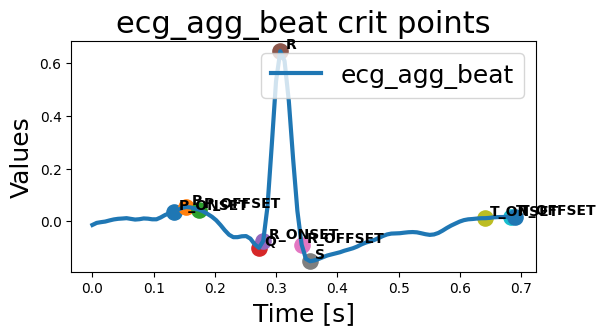

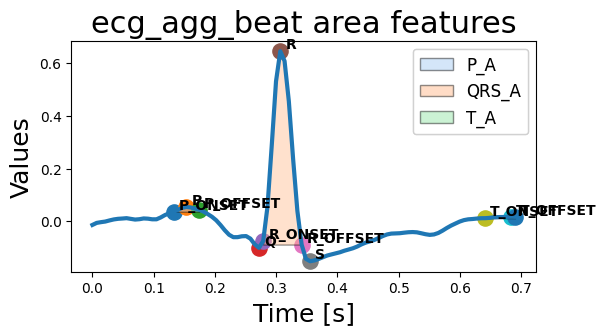

In [18]:
ecg_feats = dict(ecg_sig.extract_features(return_arr=False, plot=True))
ecg_feats

# **MimicMeasurement feature extraction**

{'ecg_basic_features__mean': 0.29260257412838053,
 'ecg_basic_features__std': 0.1868265411412319,
 'ecg_basic_features__median': 0.2649071358748778,
 'ecg_basic_features__skewness': 1.750498185849927,
 'ecg_basic_features__kurtosis': 4.877156512945016,
 'ecg_agg_beat_features__ECG II_agg_beat_basic_features__mean': 0.0009344546904413642,
 'ecg_agg_beat_features__ECG II_agg_beat_basic_features__std': 0.1328684167780084,
 'ecg_agg_beat_features__ECG II_agg_beat_basic_features__median': -0.004630033619342042,
 'ecg_agg_beat_features__ECG II_agg_beat_basic_features__skewness': 3.135676832355607,
 'ecg_agg_beat_features__ECG II_agg_beat_basic_features__kurtosis': 11.231873176677185,
 'ecg_agg_beat_features__ECG II_agg_beat_crit_points__p_onset_loc': 19,
 'ecg_agg_beat_features__ECG II_agg_beat_crit_points__p_onset_time': 0.13242239999999963,
 'ecg_agg_beat_features__ECG II_agg_beat_crit_points__p_onset_val': 0.03621845785430721,
 'ecg_agg_beat_features__ECG II_agg_beat_crit_points__p_loc': 

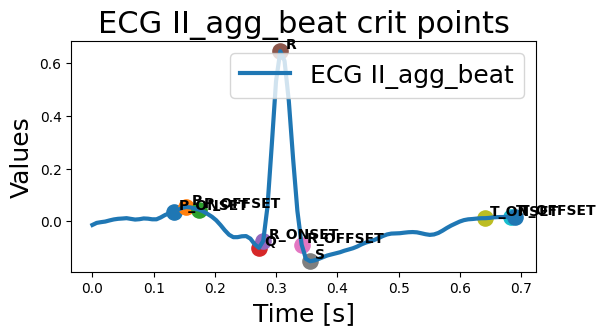

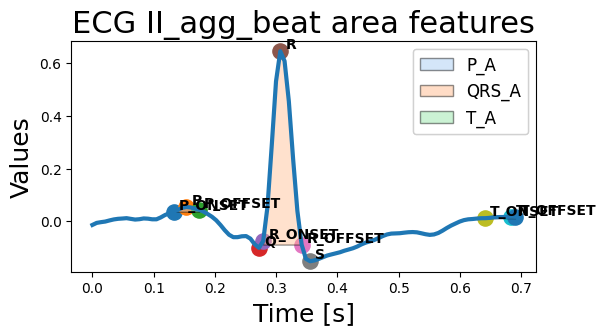

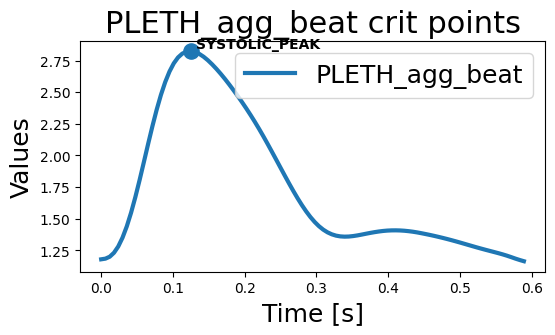

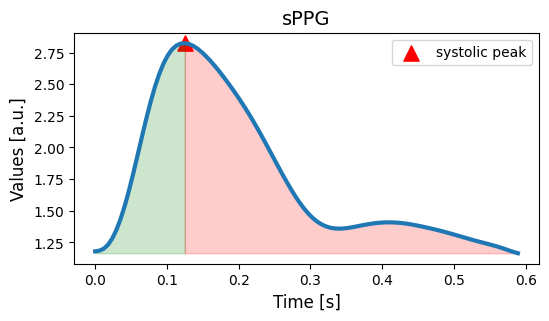

In [19]:
mimic_feats = dict(mimic_measurement.extract_features(return_arr=False, plot=True))
mimic_feats

## as array

In [20]:
array_feats = mimic_measurement.extract_features(return_arr=True, plot=False)
print(array_feats)
print(array_feats.shape)
print(mimic_measurement.feature_names)

[ 2.92602574e-01  1.86826541e-01  2.64907136e-01  1.75049819e+00
  4.87715651e+00  9.34454690e-04  1.32868417e-01 -4.63003362e-03
  3.13567683e+00  1.12318732e+01  1.90000000e+01  1.32422400e-01
  3.62184579e-02  2.20000000e+01  1.53331200e-01  5.42987396e-02
  2.50000000e+01  1.74240000e-01  4.43152775e-02  3.90000000e+01
  2.71814400e-01 -1.00643523e-01  4.00000000e+01  2.78784000e-01
 -7.45712075e-02  4.40000000e+01  3.06662400e-01  6.44994399e-01
  4.90000000e+01  3.41510400e-01 -8.82106000e-02  5.10000000e+01
  3.55449600e-01 -1.51373947e-01  9.20000000e+01  6.41203200e-01
  1.18714098e-02  9.80000000e+01  6.83020800e-01  1.81109354e-02
  9.90000000e+01  6.89990400e-01  1.73710618e-02  5.04898333e-04
  2.48968972e-02  1.87370063e-04  1.57947874e-02  1.43202458e+00
  1.97303387e-03  8.64721158e-01 -4.77476568e-01  2.58108646e+01
 -2.10400884e+01  1.49208125e-01 -1.06157261e-01  6.00924623e-01
  1.52206335e-02  1.00993932e+00  1.75729915e+00  6.14549225e-01
  1.52199413e+00  5.45075